In [1]:
import cv2, numpy as np
img = cv2.imread('18_5.JPG')
img1 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

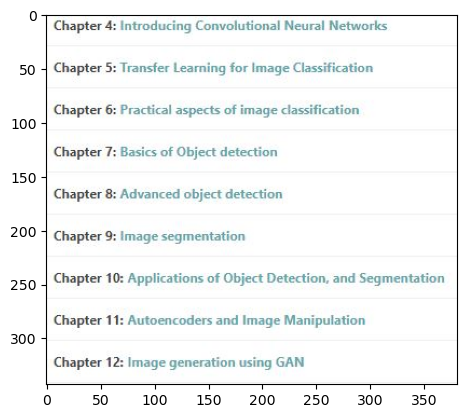

In [2]:
import matplotlib.pyplot as plt,cv2
%matplotlib inline
plt.imshow(img1)

In [3]:
img_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

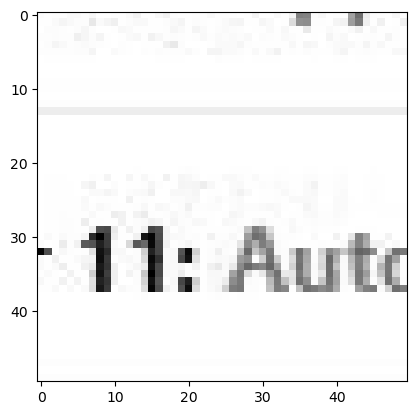

In [4]:
crop = img_gray[250:300,50:100]
plt.imshow(crop,cmap='gray')

In [5]:
_img_gray = np.uint8(img_gray < 200) * 255

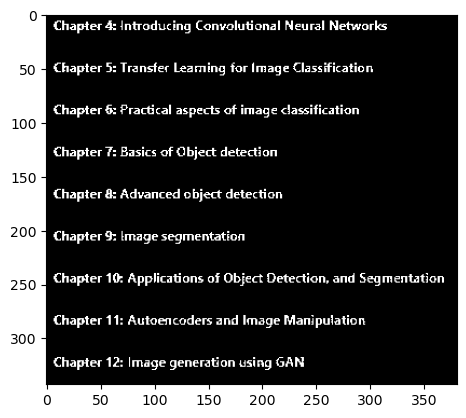

In [9]:
plt.imshow(_img_gray,cmap='gray')

In [6]:
contours,hierarchy=cv2.findContours(_img_gray, \
cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [10]:
thresh1 = np.stack([_img_gray]*3,axis=2)

In [11]:
_img_gray.shape

(343, 381)

In [12]:
thresh1.shape

(343, 381, 3)

In [13]:
thresh2 = np.zeros((thresh1.shape[0],thresh1.shape[1]))

In [14]:
for cnt in contours:
    if cv2.contourArea(cnt) > 0:
        x,y,w,h = cv2.boundingRect(cnt)
        if ((h>5) & (h<100)):
            thresh2[y:y+h,x:x+w] = thresh1[y:y+h,x:x+w,0].copy()
            cv2.rectangle(thresh1,(x,y),(x+w,y+h),(0,255,0),2)

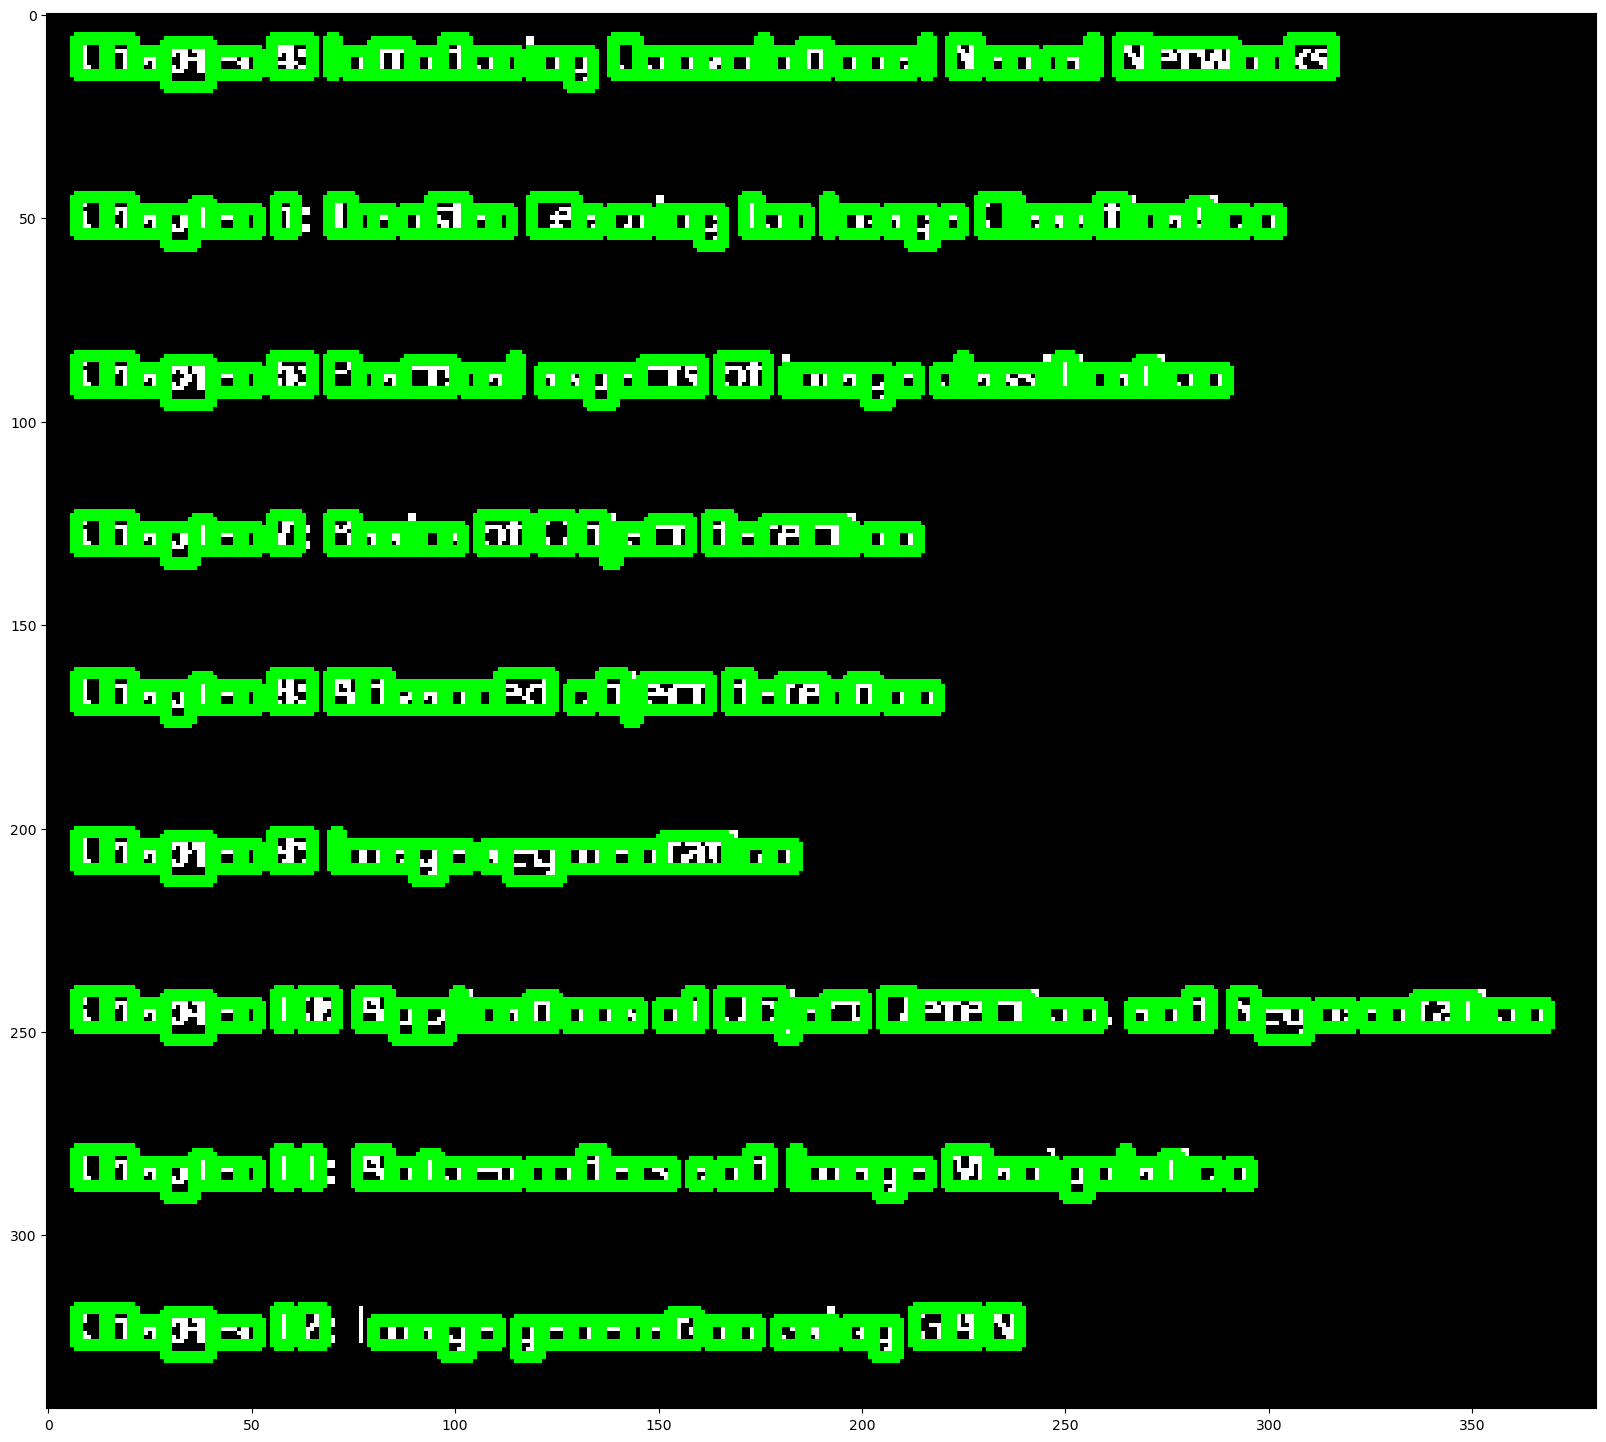

In [15]:
fig = plt.figure()
fig.set_size_inches(20,20)
plt.imshow(thresh1)

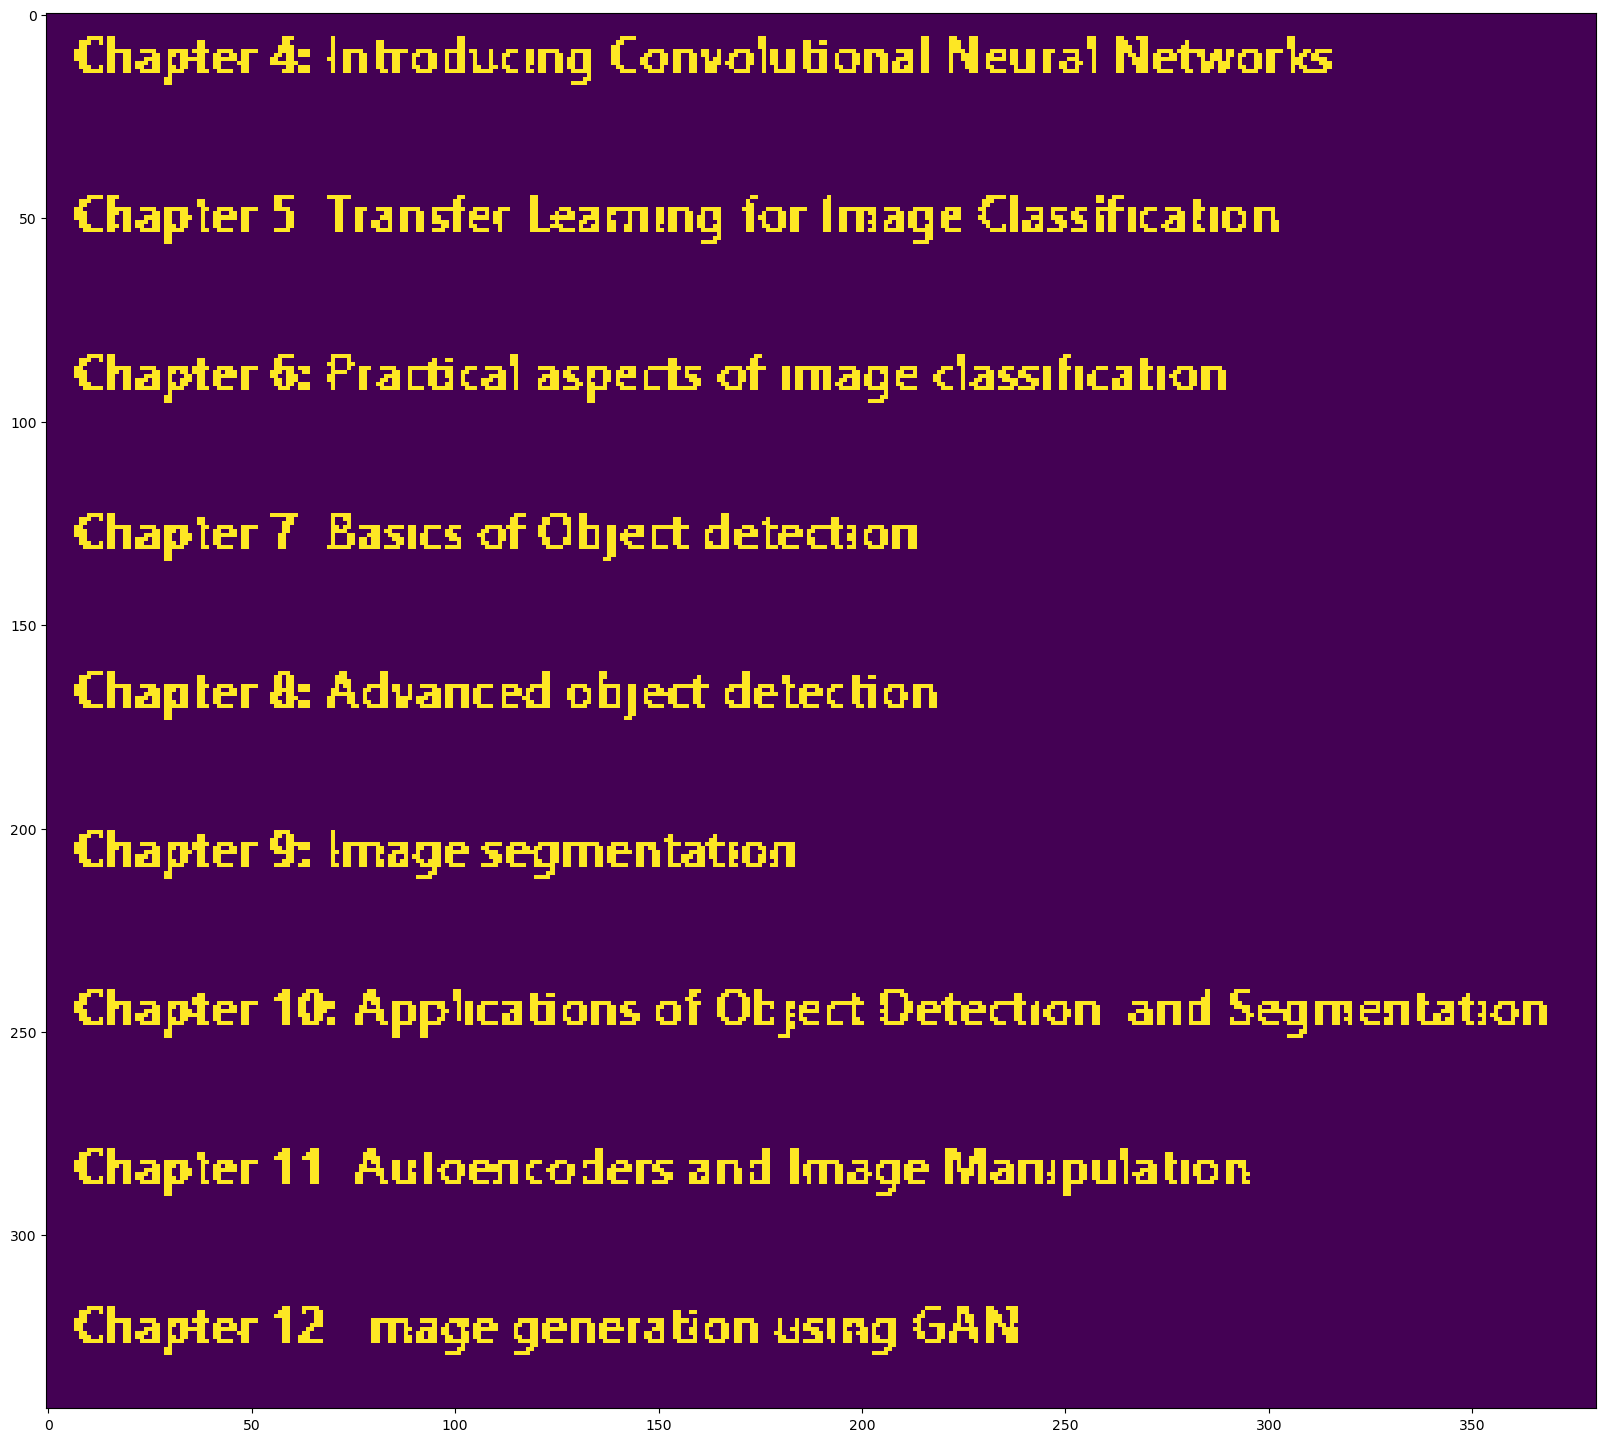

In [16]:
fig = plt.figure()
fig.set_size_inches(20,20)
plt.imshow(thresh2)

In [17]:
dilated = cv2.dilate(thresh2, np.ones((1,2),np.uint8), \
iterations=1)

In [18]:
contours,hierarchy = cv2.findContours(np.uint8(dilated), \
cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [19]:
for cnt in contours:
    if cv2.contourArea(cnt) > 5:
        [x,y,w,h] = cv2.boundingRect(cnt)
        if ((h>5) & (h<100)):
            cv2.rectangle(img1,(x,y),(x+w,y+h),(0,255,0),2)

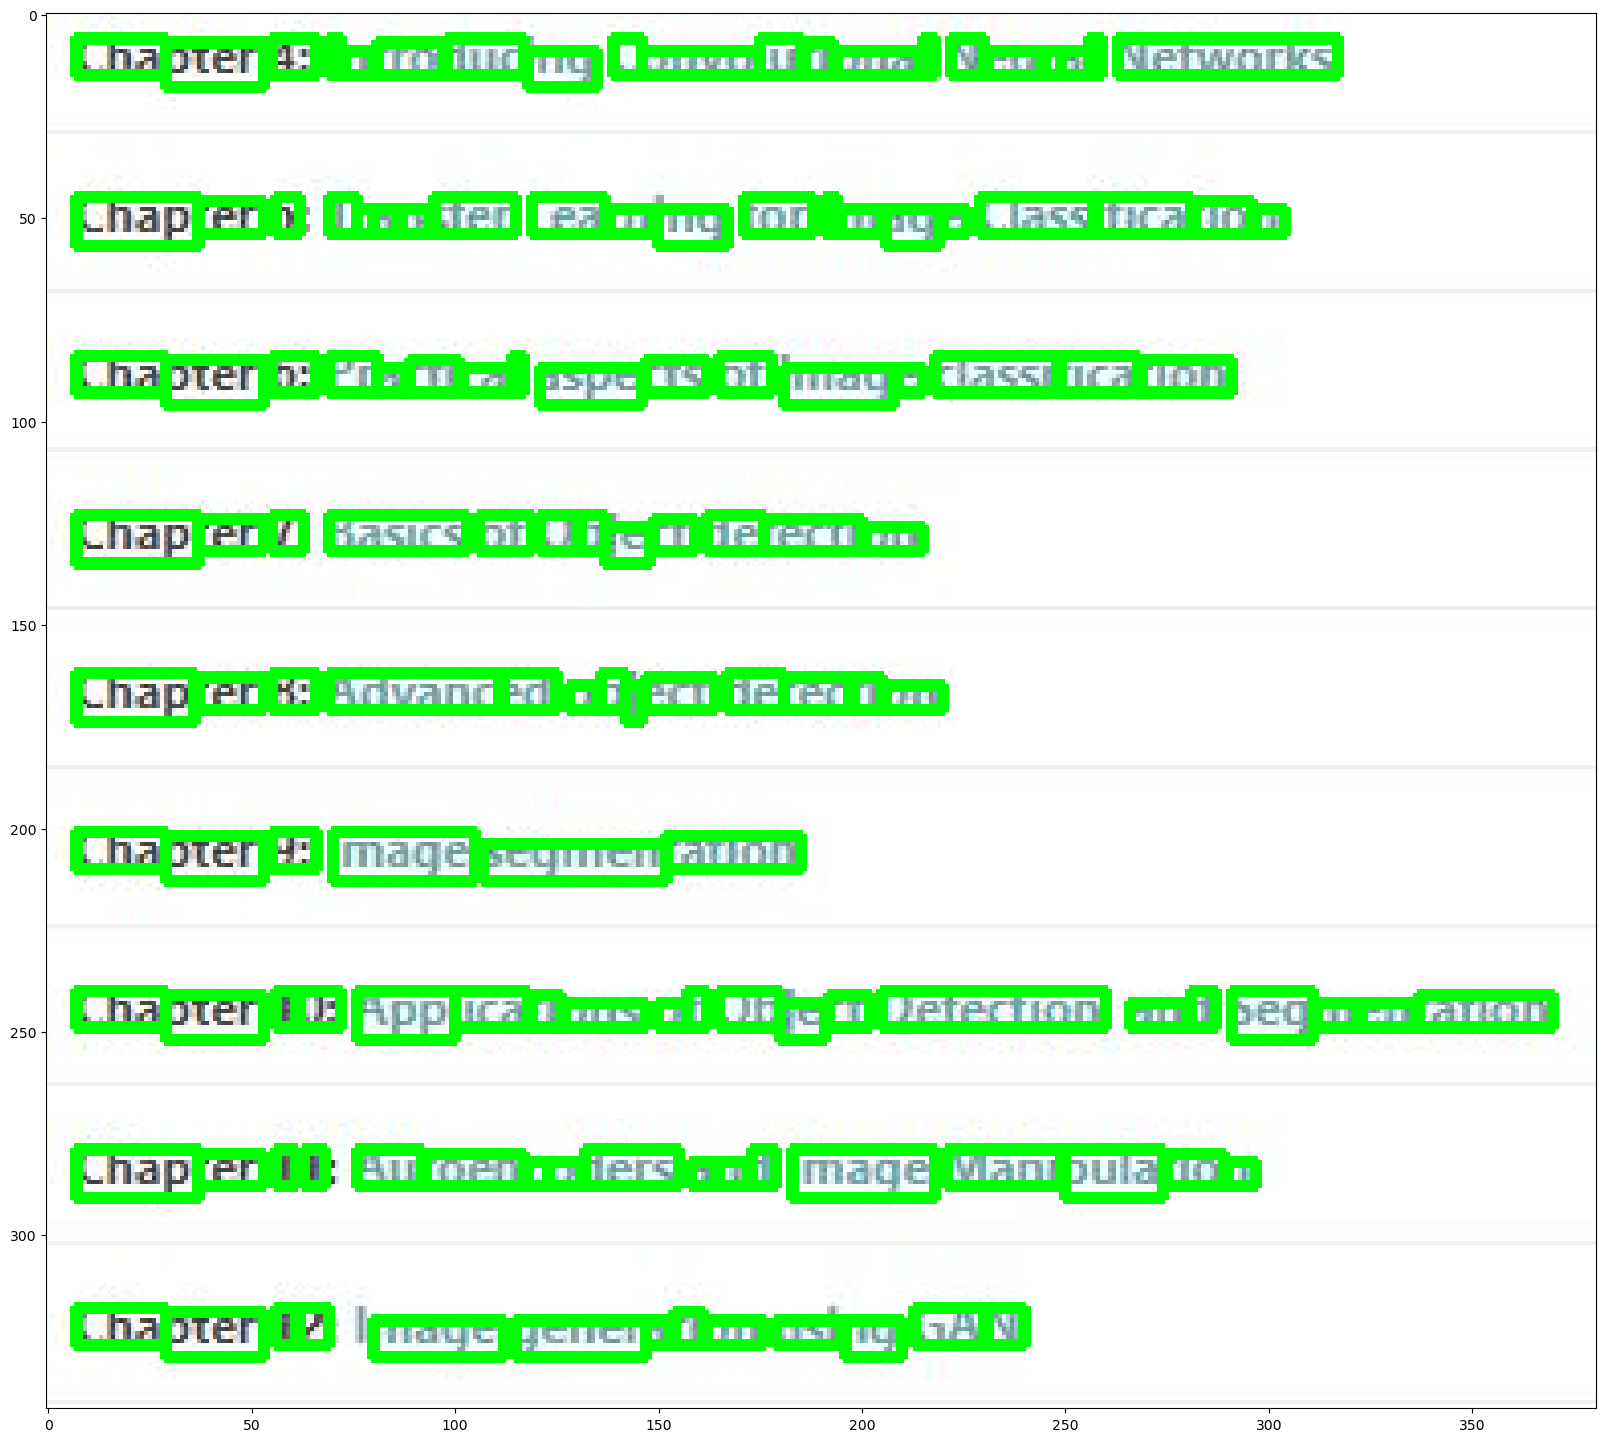

In [20]:
fig = plt.figure()
fig.set_size_inches(20,20)
plt.imshow(img1)